#Import from Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Classes for the Training

#*Evaluation class*

In [16]:

import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import metrics

class evaluate_class:

    def __init__(self):
        self.message = 'Running'

    def __repr__(self):
        return self.message

    @staticmethod
    def plot_loss_acc_curves(history):
        fig, ax = plt.subplots(2,1)
        ax[0].plot(history.history['loss'], color='b', label="Training loss")
        ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
        ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
        legend = ax[1].legend(loc='best', shadow=True)
        plt.show()

    @staticmethod
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    @staticmethod
    def Clf_report(model,Ytrue,YPred):
        print("Classification report for classifier %s:\n%s\n"
              % (model, metrics.classification_report(Ytrue, YPred)))


#Preprocessing Class

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os,cv2

class Image_datasets:

    def __init__(self,Shape,Channel):
        self.shape = Shape
        self.channel = Channel


    @staticmethod
    def get_imagesInfo(fp_dir,have_group = False):

        if have_group :
            Cats= os.listdir(fp_dir)
            for category in Cats:
                print('{} {} images'.format(category, len(os.listdir(os.path.join(fp_dir,category)))))
            data=[]
            for cat_id, category in enumerate(Cats):
                for imgfile in os.listdir(os.path.join(fp_dir,category)):
                    data.append(['{}/{}/{}'.format(fp_dir,category,imgfile),cat_id,category])
            column = ['image_path','cat_id','category']
           
        else:
            data = []
            for imgfile in os.listdir(fp_dir):
                data.append(['{}/{}'.format(fp_dir,imgfile),imgfile])
            column = ['image_path','img']
        return pd.DataFrame(data,columns=column)


    def display_group_image(self,data,no_img=6):
        if np.any(data.columns == 'category'):
             group = data['category'].unique()
             Num_grp = len(group)
             fig = plt.figure(1, figsize=(Num_grp,Num_grp))
             grid = ImageGrid(fig, 111, nrows_ncols=(Num_grp, Num_grp), axes_pad=0.05)
             i2 = -1
             for grp in group:
                 img_path = np.array(data[data['category'] == grp]['image_path'])
                 for i,img_dir in enumerate(img_path):
                     if i < Num_grp:
                         i2 = i2 + 1
                         img = cv2.imread(img_dir)
                         img = cv2.resize(img,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
                         ax = grid[i2] 
                         ax.imshow(img)
                         ax.axis('off')
                     else:
                 
                         ax.text(self.shape+30, self.shape/2, grp, verticalalignment='center')
                         break
        else:
             i2 = -1
             fig = plt.figure(1, figsize=(no_img,no_img))
             grid = ImageGrid(fig, 111, nrows_ncols=(no_img, no_img), axes_pad=0.05)
             img_path = np.array(data['image_path'])
             for i,img_dir in enumerate(img_path):
                if i < no_img*no_img:
                    i2 = i2 + 1
                    img = cv2.imread(img_dir)
                    img = cv2.resize(img,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
                    ax = grid[i2] 
                    ax.imshow(img)
                    ax.axis('off')
                else:
                    break
        plt.show()


    def load_images_from_dataset(self,data,extract = False,lwr_hsv=None,upr_hsv=None):
        return_data = []
        img_path = data['image_path']
        getImg = True
        for img_dir in img_path:
            read_images = cv2.imread(img_dir)

            if extract :
                if lwr_hsv and upr_hsv :
                    blurfliter = cv2.GaussianBlur(read_images,(5,5),0)
                    hsvfliter = cv2.cvtColor(blurfliter,cv2.COLOR_BGR2HSV)
                    maskfliter = cv2.inRange(hsvfliter,lwr_hsv,upr_hsv)
                    strucfliter = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
                    maskfliter = cv2.morphologyEx(maskfliter,cv2.MORPH_CLOSE,strucfliter)
                    boolean = maskfliter>0
                    final_images = np.zeros_like(read_images,np.uint8)
                    final_images[boolean] = read_images[boolean]
                    res_images = final_images
                    if getImg:
                        plt.subplot(2,3,1);plt.imshow(read_images)# ORIGINAL
                        plt.subplot(2,3,2);plt.imshow(blurfliter) # BLURRING
                        plt.subplot(2,3,3);plt.imshow(hsvfliter) # HSV CONVERTED
                        plt.subplot(2,3,4);plt.imshow(maskfliter) # MASKED
                        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
                        plt.subplot(2,3,6);plt.imshow(final_images)# NEW PROCESSED IMAGE
                        plt.axis('off')
                        plt.show()
                        getImg = False
                else:
                    raise ValueError('lwr_hsv or upr_hsv arguments are empty !')

            else:
                blurfliter = cv2.GaussianBlur(read_images,(5,5),0)
                rgb = cv2.cvtColor(blurfliter,cv2.COLOR_BGR2RGB)
                res_images = rgb

            resulted_images = cv2.resize(res_images,dsize =(self.shape,self.shape),interpolation = cv2.INTER_AREA)
            resulted_images = resulted_images.reshape(self.shape,self.shape,self.channel)
            return_data.append(resulted_images)

        return return_data


# Tool Class

In [18]:

from datetime import datetime
import numpy as np
import zipfile
from shutil import unpack_archive
import os

class tools:

    @staticmethod
    def start_end_timer(start_time=None):
        if not start_time:
            start_time = datetime.now()
            return start_time
        elif start_time:
            thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
            tmin, tsec = divmod(temp_sec, 60)
            print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))



#Import Classes and settings for training

In [19]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json


import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import ResNet152
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential



main_dir = '/content/drive/MyDrive/plant-seedlings-classification'
train_dir = main_dir +'/train'
test_dir = main_dir + '/test'

size = 80
channel = 3
img_data = Image_datasets(size,channel)
Num_classes = 12

# Preprocossing 

Maize 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Common Chickweed 611 images
Sugar beet 385 images
Common wheat 221 images
Scentless Mayweed 516 images
Small-flowered Cranesbill 496 images
Shepherds Purse 231 images
Cleavers 287 images
Charlock 390 images
Black-grass 263 images


------train_data image grid------


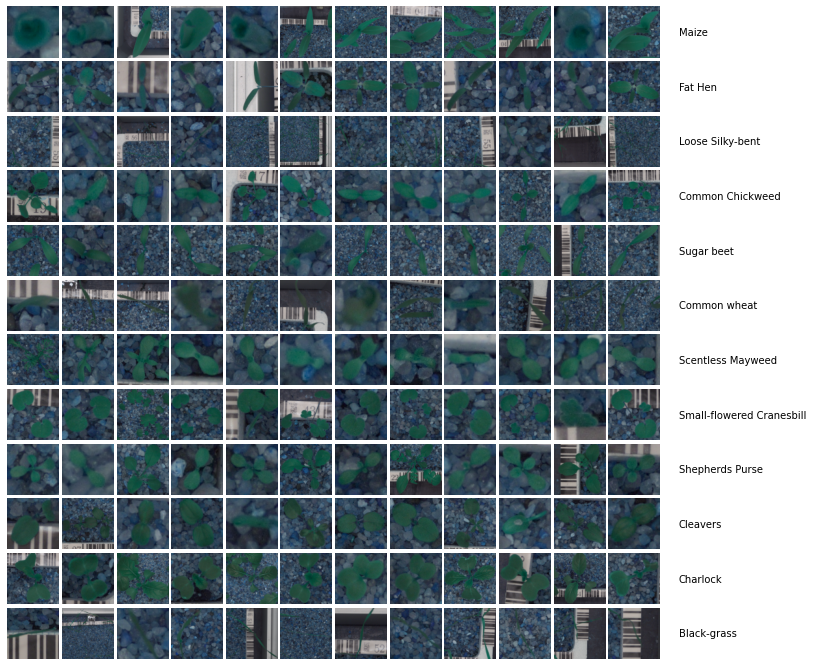

------test_data image grid------


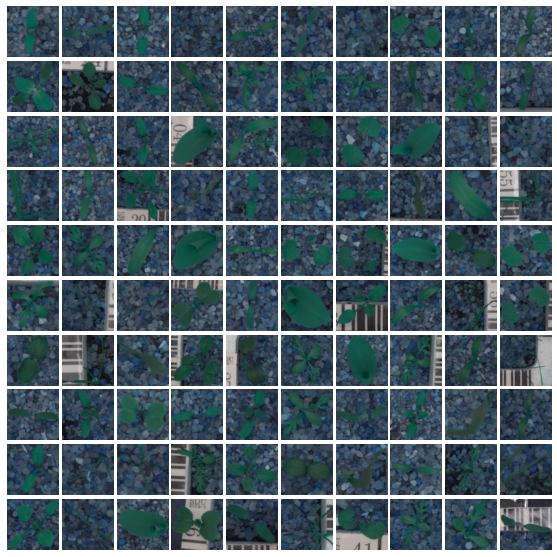



------train_data image-processing------


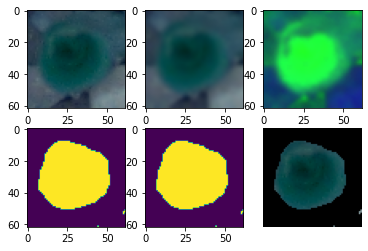

------test_data image-processing------


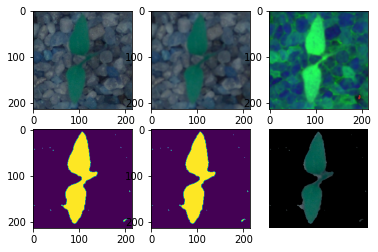



Orignal xtrain shape : (4750, 80, 80, 3)
Orignal xtest shape : (794, 80, 80, 3)


Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

------Split training and validation sets------
xtrain shape : (4275, 80, 80, 3)
ytrain shape : (4275, 12)
  xval shape : (475, 80, 80, 3)
  yval shape : (475, 12)


In [ ]:
#Loading Train Data 
train_data = img_data.get_imagesInfo(train_dir,have_group = True)
train_data.head()


#Loading Test Data
test_data = img_data.get_imagesInfo(test_dir)
test_data.head()


#Display an Image in Grid
print('\n')
print('------train_data image grid------')
img_data.display_group_image(train_data,12)
print('------test_data image grid------')
img_data.display_group_image(test_data,10)


#Load Train and Test Data
lower = (25,40,50)
upper = (75,255,255)
print('\n')
print('------train_data image-processing------')
load_xtrain = img_data.load_images_from_dataset(train_data,extract=True,lwr_hsv=lower,upr_hsv=upper)
print('------test_data image-processing------')
load_xtest = img_data.load_images_from_dataset(test_data,extract=True,lwr_hsv=lower,upr_hsv=upper)

xtrain = np.array(load_xtrain)
xtest = np.array(load_xtest)
print('\n')
print('Orignal xtrain shape : {}'.format(xtrain.shape)) 
print('Orignal xtest shape : {}'.format(xtest.shape))


#Normalization
xtrain = xtrain/255.0
xtest = xtest/255.0


#Label encoding target variable
ytrain = train_data.iloc[:,2]
species = ytrain.unique()
labels = preprocessing.LabelEncoder()
labels.fit(species)
encodedlabels = labels.transform(ytrain)
print('\n')
print('Classes'+str(labels.classes_))


#One Hot Encoding 
ytrain = to_categorical(encodedlabels)



#plit training and validation sets
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain, test_size=0.1,random_state=2,stratify=ytrain) # 0.1 = 10%
print('\n------Split training and validation sets------')
print('xtrain shape : {}'.format(xtrain.shape))
print('ytrain shape : {}'.format(ytrain.shape))
print('  xval shape : {}'.format(xval.shape))
print('  yval shape : {}'.format(yval.shape))


#Training Simple CNN model


In [ ]:
model= Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu',input_shape=(size, size, channel)))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu',input_shape=(size, size, channel)))
model.add(Flatten())
model.add(Dense(Num_classes, activation = "softmax")) 



model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 76, 76, 128)       9728      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 256)       819456    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1327104)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                15925260  
Total params: 16,754,444
Trainable params: 16,754,444
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
33/33 - 8s - loss: 2.6158 - accuracy: 0.1464 - val_loss: 2.3132 - val_accuracy: 0.1726
Epoch 2/200
33/33 - 7s - loss: 2.2450 - accuracy: 0.2257 - val_loss: 2.0668 - val_accuracy: 0.3011
Epoch 3/200
33/33 - 7s - loss: 2.1767 - accuracy: 0.2515 - val_loss: 2.0082 - val_accuracy: 0.3095
Epoch 4/200
33/33 - 8s - loss: 2.1324 - accuracy: 0.2648 - val_loss: 2.0274 - val_accuracy: 0.2989
Epoch 5/200
33/33 - 8s - loss: 2.1007 - accuracy: 0.2739 - val_loss: 2.0496 - val_accuracy: 0.2863
Epoch 6/200
33/33 - 7s - loss: 2.0851 - accuracy: 0.2747 - val_loss: 1.9774 - val_accuracy: 0.3284
Epoch 7/200
33/33 - 7s - loss: 2.0548 - accuracy: 0.2896 - val_loss: 1.9401 - val_accuracy: 0.3537
Epoch 8/200
33/33 - 7s - loss: 2.0560 - accuracy: 0.2841 - val_loss: 1.8996 - val_accuracy: 0.3537
Epoch 9/200
33/33 - 7s - loss: 2.0453 - accuracy: 0.2956 - val_loss: 2.0002 - val_accuracy: 0.2947
Epoch 10/200
33/33 - 7s - loss: 2.0495 - accuracy: 0.2959 - val_loss: 1.9022 - val_accuracy: 0.3726
Epoch 11/

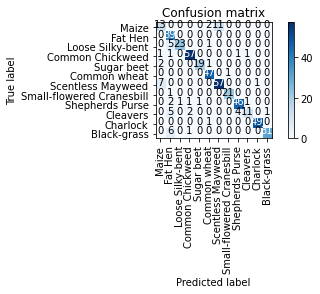

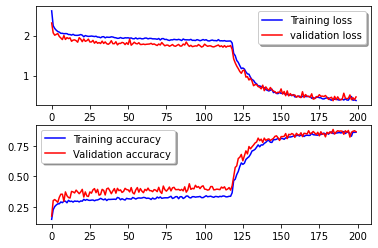

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9f3ce11b90>:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        26
           1       0.66      1.00      0.80        39
           2       0.96      0.79      0.87        29
           3       0.93      0.93      0.93        61
           4       0.95      0.86      0.90        22
           5       0.90      0.98      0.94        48
           6       0.84      0.88      0.86        65
           7       0.95      0.95      0.95        22
           8       0.90      0.88      0.89        52
           9       0.85      0.48      0.61        23
          10       0.98      0.98      0.98        50
          11       0.97      0.82      0.89        38

    accuracy                           0.87       475
   macro avg       0.87      0.84      0.85       475
weighted avg       0.88      0.87      0.87       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluaevaluate_classte_model.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_CNN.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#Training (Transfer Learning Models)

#VGG16


In [ ]:


# Create a VGG16 model
vgg = VGG16(input_shape=(size, size, channel ), weights='imagenet', include_top=False) #Training with Imagenet weights


#train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
______________________________________________________________

Epoch 1/200
33/33 - 46s - loss: 1.9752 - accuracy: 0.3453 - val_loss: 1.5180 - val_accuracy: 0.4989
Epoch 2/200
33/33 - 7s - loss: 1.4735 - accuracy: 0.5288 - val_loss: 1.2239 - val_accuracy: 0.6000
Epoch 3/200
33/33 - 7s - loss: 1.2895 - accuracy: 0.5799 - val_loss: 1.1022 - val_accuracy: 0.6379
Epoch 4/200
33/33 - 7s - loss: 1.1693 - accuracy: 0.6327 - val_loss: 0.9843 - val_accuracy: 0.6842
Epoch 5/200
33/33 - 7s - loss: 1.0897 - accuracy: 0.6516 - val_loss: 0.9302 - val_accuracy: 0.6674
Epoch 6/200
33/33 - 7s - loss: 1.0473 - accuracy: 0.6614 - val_loss: 0.8894 - val_accuracy: 0.6947
Epoch 7/200
33/33 - 7s - loss: 0.9986 - accuracy: 0.6745 - val_loss: 0.8582 - val_accuracy: 0.7137
Epoch 8/200
33/33 - 7s - loss: 0.9662 - accuracy: 0.6904 - val_loss: 0.8148 - val_accuracy: 0.7263
Epoch 9/200
33/33 - 7s - loss: 0.9355 - accuracy: 0.6940 - val_loss: 0.7845 - val_accuracy: 0.7368
Epoch 10/200
33/33 - 7s - loss: 0.9012 - accuracy: 0.7130 - val_loss: 0.7578 - val_accuracy: 0.7453
Epoch 11

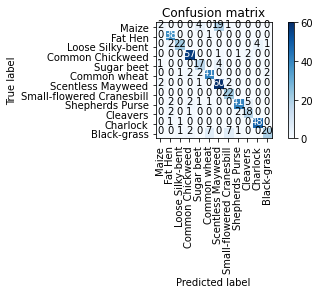

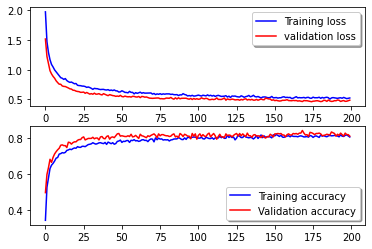

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7f31eb7b1c50>:
              precision    recall  f1-score   support

           0       0.40      0.08      0.13        26
           1       0.84      0.97      0.90        39
           2       0.88      0.76      0.81        29
           3       0.89      0.93      0.91        61
           4       0.68      0.77      0.72        22
           5       0.82      0.85      0.84        48
           6       0.71      0.92      0.81        65
           7       0.69      1.00      0.81        22
           8       0.91      0.79      0.85        52
           9       0.72      0.78      0.75        23
          10       0.92      0.96      0.94        50
          11       0.87      0.53      0.66        38

    accuracy                           0.81       475
   macro avg       0.78      0.78      0.76       475
weighted avg       0.80      0.81      0.79       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_VGG16.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#VGG19


In [ ]:


# Create a VGG19 model
vgg = VGG19(input_shape=(size, size, channel ), weights='imagenet', include_top=False) 

#train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg19 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()


80142336/80134624 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
____________________________________________________________

Epoch 1/200
33/33 - 8s - loss: 2.0711 - accuracy: 0.3185 - val_loss: 1.5438 - val_accuracy: 0.5326
Epoch 2/200
33/33 - 7s - loss: 1.5196 - accuracy: 0.5199 - val_loss: 1.2322 - val_accuracy: 0.6232
Epoch 3/200
33/33 - 7s - loss: 1.3103 - accuracy: 0.5893 - val_loss: 1.0842 - val_accuracy: 0.6442
Epoch 4/200
33/33 - 7s - loss: 1.1978 - accuracy: 0.6200 - val_loss: 0.9893 - val_accuracy: 0.6779
Epoch 5/200
33/33 - 7s - loss: 1.1169 - accuracy: 0.6467 - val_loss: 0.9178 - val_accuracy: 0.6863
Epoch 6/200
33/33 - 7s - loss: 1.0610 - accuracy: 0.6651 - val_loss: 0.8754 - val_accuracy: 0.7116
Epoch 7/200
33/33 - 7s - loss: 1.0266 - accuracy: 0.6687 - val_loss: 0.8262 - val_accuracy: 0.7221
Epoch 8/200
33/33 - 7s - loss: 0.9878 - accuracy: 0.6800 - val_loss: 0.8102 - val_accuracy: 0.7347
Epoch 9/200
33/33 - 7s - loss: 0.9695 - accuracy: 0.6856 - val_loss: 0.7927 - val_accuracy: 0.7305
Epoch 10/200
33/33 - 7s - loss: 0.9263 - accuracy: 0.7012 - val_loss: 0.7661 - val_accuracy: 0.7347
Epoch 11/

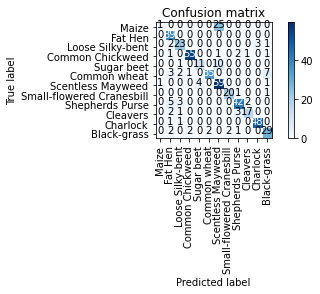

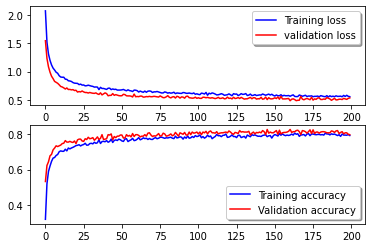

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7f31efd0f550>:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       0.71      1.00      0.83        39
           2       0.74      0.79      0.77        29
           3       0.95      0.90      0.92        61
           4       0.73      0.50      0.59        22
           5       0.95      0.73      0.82        48
           6       0.62      0.91      0.74        65
           7       0.91      0.91      0.91        22
           8       0.86      0.81      0.83        52
           9       0.85      0.74      0.79        23
          10       0.94      0.96      0.95        50
          11       0.72      0.76      0.74        38

    accuracy                           0.80       475
   macro avg       0.79      0.75      0.75       475
weighted avg       0.80      0.80      0.78       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_VGG19.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#InceptionV3


In [ ]:


# Create a InceptionV3 model
InceptionV3 = applications.InceptionV3(input_shape=(size, size, channel )
    ,include_top=False, weights='imagenet' )



x = Flatten()(InceptionV3.output) #Output obtained on InceptionV3 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=InceptionV3.input, outputs=prediction)

model.summary()


87916544/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 39, 39, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 39, 39, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 39, 39, 32)   0           batch_normalization[0][0]        
___________________________

Epoch 1/200
33/33 - 22s - loss: 1.5051 - accuracy: 0.5035 - val_loss: 49.8575 - val_accuracy: 0.1284
Epoch 2/200
33/33 - 8s - loss: 0.6923 - accuracy: 0.7728 - val_loss: 6.1841 - val_accuracy: 0.1979
Epoch 3/200
33/33 - 8s - loss: 0.4719 - accuracy: 0.8449 - val_loss: 2.9839 - val_accuracy: 0.3600
Epoch 4/200
33/33 - 8s - loss: 0.4329 - accuracy: 0.8517 - val_loss: 59.1490 - val_accuracy: 0.3221
Epoch 5/200
33/33 - 8s - loss: 0.3944 - accuracy: 0.8633 - val_loss: 6.0888 - val_accuracy: 0.1200
Epoch 6/200
33/33 - 8s - loss: 0.3771 - accuracy: 0.8691 - val_loss: 2.3511 - val_accuracy: 0.4463
Epoch 7/200
33/33 - 8s - loss: 0.3401 - accuracy: 0.8850 - val_loss: 3.0697 - val_accuracy: 0.4400
Epoch 8/200
33/33 - 8s - loss: 0.3185 - accuracy: 0.8905 - val_loss: 2.9458 - val_accuracy: 0.4253
Epoch 9/200
33/33 - 8s - loss: 0.2691 - accuracy: 0.9029 - val_loss: 1.0963 - val_accuracy: 0.7032
Epoch 10/200
33/33 - 8s - loss: 0.2891 - accuracy: 0.8994 - val_loss: 0.9417 - val_accuracy: 0.7116
Epoch 

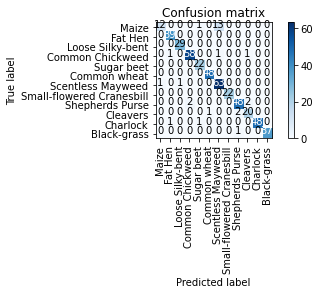

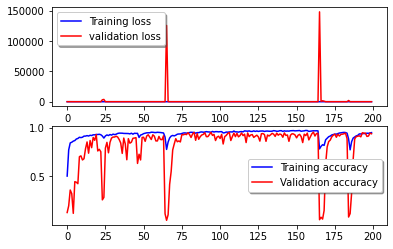

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7f31eaea1f90>:
              precision    recall  f1-score   support

           0       0.92      0.46      0.62        26
           1       0.95      1.00      0.97        39
           2       0.97      1.00      0.98        29
           3       0.97      0.95      0.96        61
           4       0.92      1.00      0.96        22
           5       0.98      1.00      0.99        48
           6       0.82      0.97      0.89        65
           7       1.00      1.00      1.00        22
           8       0.94      0.92      0.93        52
           9       0.87      0.87      0.87        23
          10       1.00      0.96      0.98        50
          11       1.00      0.97      0.99        38

    accuracy                           0.94       475
   macro avg       0.94      0.93      0.93       475
weighted avg       0.94      0.94      0.94       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_InceptionV3.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet50

In [ ]:


# Create a ResNet50 model
ResNet50 = ResNet50(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))



x = Flatten()(ResNet50.output) #Output obtained on ResNet50 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=ResNet50.input, outputs=prediction)

model.summary()



94773248/94765736 [==============================] - 1s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 86, 86, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 40, 40, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1_conv[0][0]                 
___________________________

Epoch 1/200
33/33 - 19s - loss: 1.7845 - accuracy: 0.5937 - val_loss: 109039.5234 - val_accuracy: 0.1053
Epoch 2/200
33/33 - 8s - loss: 0.6578 - accuracy: 0.7873 - val_loss: 34.7446 - val_accuracy: 0.1053
Epoch 3/200
33/33 - 8s - loss: 0.4700 - accuracy: 0.8324 - val_loss: 3.2453 - val_accuracy: 0.1095
Epoch 4/200
33/33 - 9s - loss: 0.3880 - accuracy: 0.8647 - val_loss: 6.4142 - val_accuracy: 0.1368
Epoch 5/200
33/33 - 8s - loss: 0.4238 - accuracy: 0.8705 - val_loss: 32.8387 - val_accuracy: 0.0484
Epoch 6/200
33/33 - 9s - loss: 3.4282 - accuracy: 0.5490 - val_loss: 2623397376.0000 - val_accuracy: 0.1011
Epoch 7/200
33/33 - 8s - loss: 2.3070 - accuracy: 0.6012 - val_loss: 214471968.0000 - val_accuracy: 0.0821
Epoch 8/200
33/33 - 8s - loss: 2.1573 - accuracy: 0.5758 - val_loss: 15.4364 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 8s - loss: 1.5312 - accuracy: 0.6684 - val_loss: 8.2679 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 8s - loss: 1.1310 - accuracy: 0.7041 - val_loss: 8.5825 - val_

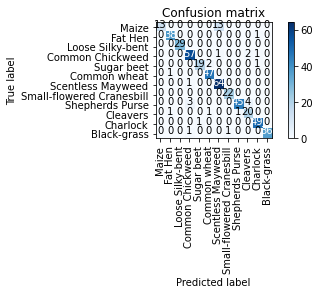

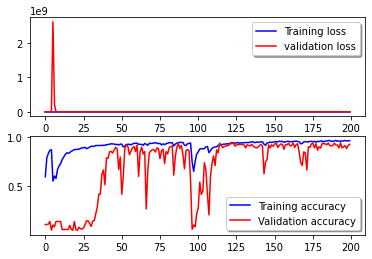

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7f31ebed1d10>:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        26
           1       0.95      0.97      0.96        39
           2       1.00      1.00      1.00        29
           3       0.92      0.93      0.93        61
           4       0.95      0.86      0.90        22
           5       0.94      0.98      0.96        48
           6       0.82      0.98      0.90        65
           7       0.96      1.00      0.98        22
           8       0.98      0.87      0.92        52
           9       0.77      0.87      0.82        23
          10       0.94      0.98      0.96        50
          11       1.00      0.95      0.97        38

    accuracy                           0.92       475
   macro avg       0.94      0.91      0.91       475
weighted avg       0.93      0.92      0.92       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet50.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet101

In [ ]:


# Create a ResNet101 model
ResNet101 = ResNet101(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))



x = Flatten()(ResNet101.output) #Output obtained on ResNet101 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=ResNet101.input, outputs=prediction)

model.summary()



171450368/171446536 [==============================] - 1s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 86, 86, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 40, 40, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1_conv[0][0]                 
_________________________

Epoch 1/200
33/33 - 26s - loss: 2.6062 - accuracy: 0.5197 - val_loss: 110686608.0000 - val_accuracy: 0.1284
Epoch 2/200
33/33 - 14s - loss: 1.2241 - accuracy: 0.6272 - val_loss: 401020.1875 - val_accuracy: 0.1284
Epoch 3/200
33/33 - 14s - loss: 1.8316 - accuracy: 0.6212 - val_loss: 359807968.0000 - val_accuracy: 0.0800
Epoch 4/200
33/33 - 14s - loss: 1.6814 - accuracy: 0.5843 - val_loss: 2287.5942 - val_accuracy: 0.1011
Epoch 5/200
33/33 - 14s - loss: 1.7165 - accuracy: 0.5105 - val_loss: 16464.1016 - val_accuracy: 0.0463
Epoch 6/200
33/33 - 14s - loss: 1.3013 - accuracy: 0.6009 - val_loss: 3273.0959 - val_accuracy: 0.1011
Epoch 7/200
33/33 - 14s - loss: 0.9424 - accuracy: 0.6957 - val_loss: 5.6881 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 14s - loss: 1.1082 - accuracy: 0.6940 - val_loss: 8.6050 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 14s - loss: 0.7159 - accuracy: 0.7762 - val_loss: 6.7895 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 14s - loss: 0.6064 - accuracy: 0.7921 - val_loss

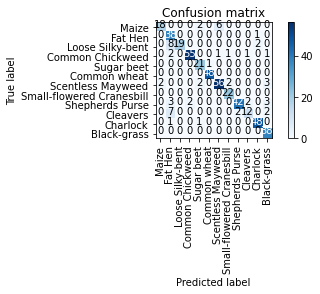

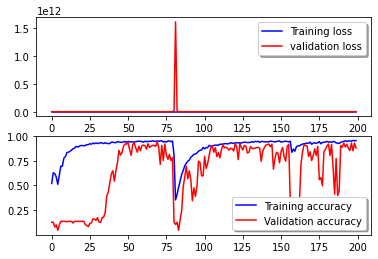

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7f31f246ddd0>:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.64      0.97      0.78        39
           2       1.00      0.66      0.79        29
           3       0.96      0.90      0.93        61
           4       0.81      0.95      0.88        22
           5       0.98      1.00      0.99        48
           6       0.89      0.86      0.88        65
           7       0.88      1.00      0.94        22
           8       0.95      0.81      0.88        52
           9       0.80      0.52      0.63        23
          10       0.94      0.96      0.95        50
          11       0.81      1.00      0.89        38

    accuracy                           0.88       475
   macro avg       0.88      0.86      0.86       475
weighted avg       0.89      0.88      0.88       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet101.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet152

In [ ]:


# Create a ResNet152 model
ResNet152 = ResNet152(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))



x = Flatten()(ResNet152.output) #Output obtained on ResNet152 is now flattened. 
prediction = Dense( Num_classes, activation='softmax')(x) 

#Creating model object 
model = Model(inputs=ResNet152.input, outputs=prediction)

model.summary()



234700800/234698864 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 86, 86, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 40, 40, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1_conv[0][0]                 
___________________________

Epoch 1/200
33/33 - 38s - loss: 2.1976 - accuracy: 0.5218 - val_loss: 160721350426624.0000 - val_accuracy: 0.1053
Epoch 2/200
33/33 - 19s - loss: 0.8818 - accuracy: 0.7027 - val_loss: 19741034.0000 - val_accuracy: 0.1053
Epoch 3/200
33/33 - 18s - loss: 0.5874 - accuracy: 0.8025 - val_loss: 5.1484 - val_accuracy: 0.1368
Epoch 4/200
33/33 - 18s - loss: 0.4660 - accuracy: 0.8343 - val_loss: 6.9680 - val_accuracy: 0.1368
Epoch 5/200
33/33 - 19s - loss: 0.3945 - accuracy: 0.8594 - val_loss: 8.4289 - val_accuracy: 0.1368
Epoch 6/200
33/33 - 19s - loss: 0.3803 - accuracy: 0.8662 - val_loss: 6.1578 - val_accuracy: 0.1368
Epoch 7/200
33/33 - 19s - loss: 0.3251 - accuracy: 0.8859 - val_loss: 7.1631 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 19s - loss: 0.3051 - accuracy: 0.8903 - val_loss: 6.6421 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 19s - loss: 0.2980 - accuracy: 0.8939 - val_loss: 6.8021 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 19s - loss: 0.3292 - accuracy: 0.8867 - val_loss: 8.5710 -

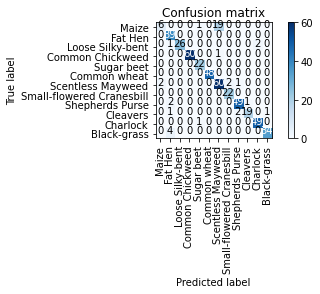

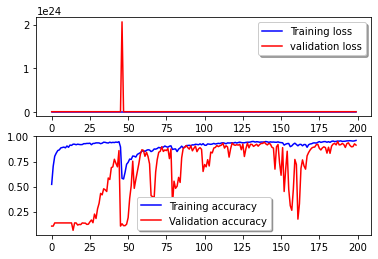

Classification report for classifier <tensorflow.python.keras.engine.functional.Functional object at 0x7fc3db085c90>:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        26
           1       0.83      1.00      0.91        39
           2       1.00      0.90      0.95        29
           3       1.00      0.98      0.99        61
           4       0.92      1.00      0.96        22
           5       1.00      1.00      1.00        48
           6       0.75      0.92      0.83        65
           7       0.92      1.00      0.96        22
           8       0.94      0.94      0.94        52
           9       0.95      0.83      0.88        23
          10       0.96      0.98      0.97        50
          11       0.97      0.89      0.93        38

    accuracy                           0.91       475
   macro avg       0.92      0.89      0.89       475
weighted avg       0.92      0.91      0.90       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet152.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#CNN with additional Dense Layers with batch normalization

In [ ]:
model= Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu',input_shape=(size, size, channel)))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu',input_shape=(size, size, channel)))
model.add(Flatten())



model.add(Dense(512,activation=('relu'),input_dim=256)) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 76, 76, 128)       9728      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 256)       819456    
_________________________________________________________________
flatten (Flatten)            (None, 1327104)           0         
_________________________________________________________________
dense (Dense)                (None, 512)               679477760 
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

Epoch 1/200
33/33 - 58s - loss: 3.1388 - accuracy: 0.1688 - val_loss: 18.5990 - val_accuracy: 0.0821
Epoch 2/200
33/33 - 15s - loss: 2.6320 - accuracy: 0.2204 - val_loss: 8.9966 - val_accuracy: 0.1411
Epoch 3/200
33/33 - 15s - loss: 2.4150 - accuracy: 0.2460 - val_loss: 4.9331 - val_accuracy: 0.1832
Epoch 4/200
33/33 - 15s - loss: 2.3039 - accuracy: 0.2616 - val_loss: 3.1489 - val_accuracy: 0.2463
Epoch 5/200
33/33 - 15s - loss: 2.2494 - accuracy: 0.2665 - val_loss: 2.3726 - val_accuracy: 0.2842
Epoch 6/200
33/33 - 15s - loss: 2.1629 - accuracy: 0.2679 - val_loss: 2.2061 - val_accuracy: 0.2758
Epoch 7/200
33/33 - 15s - loss: 2.1057 - accuracy: 0.2699 - val_loss: 1.8590 - val_accuracy: 0.3558
Epoch 8/200
33/33 - 15s - loss: 2.0688 - accuracy: 0.2838 - val_loss: 1.8894 - val_accuracy: 0.3579
Epoch 9/200
33/33 - 15s - loss: 2.0074 - accuracy: 0.2942 - val_loss: 1.9063 - val_accuracy: 0.3368
Epoch 10/200
33/33 - 15s - loss: 1.9428 - accuracy: 0.3089 - val_loss: 3.2395 - val_accuracy: 0.160

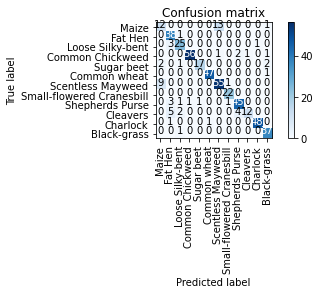

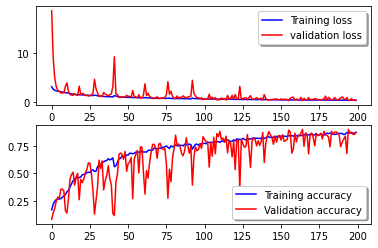

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fed31ceb090>:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        26
           1       0.76      0.97      0.85        39
           2       0.81      0.86      0.83        29
           3       0.98      0.92      0.95        61
           4       0.94      0.77      0.85        22
           5       0.98      0.98      0.98        48
           6       0.80      0.85      0.82        65
           7       0.92      1.00      0.96        22
           8       0.88      0.87      0.87        52
           9       0.92      0.52      0.67        23
          10       0.98      0.96      0.97        50
          11       0.88      0.97      0.93        38

    accuracy                           0.87       475
   macro avg       0.86      0.84      0.85       475
weighted avg       0.88      0.87      0.87       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_CNN_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#Transfer learning with additional Dense Layers with batch normalization

#VGG16


In [ ]:

# Create a VGG16 model
vgg = VGG16(input_shape=(size, size, channel ), weights='imagenet', include_top=False) #Training with Imagenet weights

model= Sequential()
model.add(vgg) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))#VGG16
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(512,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_______________________________________________________

Epoch 1/200
33/33 - 20s - loss: 3.1406 - accuracy: 0.1456 - val_loss: 119.0879 - val_accuracy: 0.0463
Epoch 2/200
33/33 - 8s - loss: 2.4728 - accuracy: 0.2252 - val_loss: 16.0178 - val_accuracy: 0.1537
Epoch 3/200
33/33 - 8s - loss: 2.2121 - accuracy: 0.2558 - val_loss: 6.3890 - val_accuracy: 0.2168
Epoch 4/200
33/33 - 8s - loss: 2.0637 - accuracy: 0.2824 - val_loss: 28.0139 - val_accuracy: 0.1284
Epoch 5/200
33/33 - 8s - loss: 2.0038 - accuracy: 0.2826 - val_loss: 7.1301 - val_accuracy: 0.2126
Epoch 6/200
33/33 - 8s - loss: 1.8903 - accuracy: 0.3301 - val_loss: 14.5165 - val_accuracy: 0.1747
Epoch 7/200
33/33 - 8s - loss: 1.8284 - accuracy: 0.3328 - val_loss: 22.5423 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 8s - loss: 1.7761 - accuracy: 0.3386 - val_loss: 12.3783 - val_accuracy: 0.1453
Epoch 9/200
33/33 - 8s - loss: 1.7886 - accuracy: 0.3453 - val_loss: 13.8591 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 8s - loss: 1.7535 - accuracy: 0.3460 - val_loss: 7.1126 - val_accuracy: 0.1705


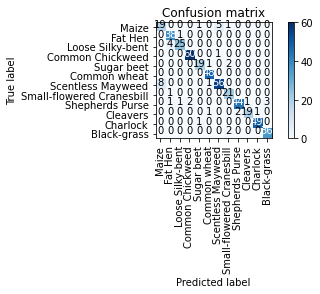

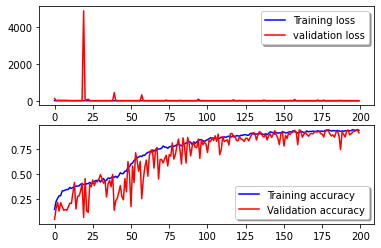

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fed353f10d0>:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.86      0.97      0.92        39
           2       0.93      0.86      0.89        29
           3       0.97      0.98      0.98        61
           4       0.90      0.86      0.88        22
           5       0.94      1.00      0.97        48
           6       0.90      0.86      0.88        65
           7       0.81      0.95      0.88        22
           8       0.96      0.85      0.90        52
           9       0.95      0.83      0.88        23
          10       0.98      0.98      0.98        50
          11       0.92      0.95      0.94        38

    accuracy                           0.91       475
   macro avg       0.90      0.90      0.90       475
weighted avg       0.92      0.91      0.91       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_VGG16_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#VGG19


In [ ]:


# Create a VGG19 model
vgg = VGG19(input_shape=(size, size, channel ), weights='imagenet', include_top=False) 
model= Sequential()
model.add(vgg) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))#VGG19
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(512,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


Epoch 1/200
33/33 - 12s - loss: 3.1132 - accuracy: 0.1620 - val_loss: 669565.6875 - val_accuracy: 0.1411
Epoch 2/200
33/33 - 10s - loss: 2.5471 - accuracy: 0.2202 - val_loss: 5214.9546 - val_accuracy: 0.2295
Epoch 3/200
33/33 - 10s - loss: 2.2789 - accuracy: 0.2426 - val_loss: 3.3513 - val_accuracy: 0.2842
Epoch 4/200
33/33 - 10s - loss: 2.1389 - accuracy: 0.2771 - val_loss: 13.0191 - val_accuracy: 0.1389
Epoch 5/200
33/33 - 10s - loss: 1.9982 - accuracy: 0.2923 - val_loss: 37.0910 - val_accuracy: 0.1368
Epoch 6/200
33/33 - 10s - loss: 1.9680 - accuracy: 0.2985 - val_loss: 20.9782 - val_accuracy: 0.1642
Epoch 7/200
33/33 - 10s - loss: 1.8891 - accuracy: 0.3229 - val_loss: 4.5785 - val_accuracy: 0.2442
Epoch 8/200
33/33 - 10s - loss: 1.8411 - accuracy: 0.3210 - val_loss: 16.9905 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 10s - loss: 1.7882 - accuracy: 0.3470 - val_loss: 12.1486 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 10s - loss: 1.7989 - accuracy: 0.3352 - val_loss: 23.0041 - val_ac

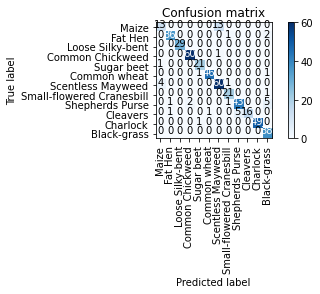

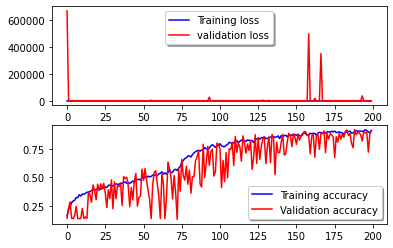

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fed3340ab90>:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        26
           1       0.95      0.92      0.94        39
           2       1.00      1.00      1.00        29
           3       0.97      0.98      0.98        61
           4       0.91      0.95      0.93        22
           5       0.98      0.96      0.97        48
           6       0.81      0.92      0.86        65
           7       0.88      0.95      0.91        22
           8       0.90      0.83      0.86        52
           9       1.00      0.70      0.82        23
          10       1.00      0.98      0.99        50
          11       0.81      1.00      0.89        38

    accuracy                           0.91       475
   macro avg       0.91      0.89      0.90       475
weighted avg       0.91      0.91      0.91       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_VGG19_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#InceptionV3


In [ ]:
# Create a InceptionV3 model
InceptionV3 = applications.InceptionV3(input_shape=(size, size, channel )
    ,include_top=False, weights='imagenet' )

model= Sequential()
model.add(InceptionV3) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=2048))#inception_v3 
model.add(BatchNormalization())
model.add(Dropout(.2))


model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


87916544/87910968 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_98 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                12300     
Total params: 23,917,356
Trainable params: 23,880,876
N

Epoch 1/200
33/33 - 22s - loss: 2.0786 - accuracy: 0.3791 - val_loss: 855.0302 - val_accuracy: 0.1368
Epoch 2/200
33/33 - 8s - loss: 1.3015 - accuracy: 0.5809 - val_loss: 3.5972 - val_accuracy: 0.0716
Epoch 3/200
33/33 - 8s - loss: 1.0017 - accuracy: 0.7027 - val_loss: 2.6934 - val_accuracy: 0.0674
Epoch 4/200
33/33 - 8s - loss: 0.8332 - accuracy: 0.7415 - val_loss: 5.5101 - val_accuracy: 0.1916
Epoch 5/200
33/33 - 8s - loss: 0.6892 - accuracy: 0.7866 - val_loss: 90.1652 - val_accuracy: 0.2611
Epoch 6/200
33/33 - 8s - loss: 0.5466 - accuracy: 0.8273 - val_loss: 2.0490 - val_accuracy: 0.4021
Epoch 7/200
33/33 - 8s - loss: 0.4811 - accuracy: 0.8437 - val_loss: 1.8146 - val_accuracy: 0.5032
Epoch 8/200
33/33 - 8s - loss: 0.5067 - accuracy: 0.8474 - val_loss: 1.6725 - val_accuracy: 0.5347
Epoch 9/200
33/33 - 8s - loss: 0.3979 - accuracy: 0.8676 - val_loss: 1.3502 - val_accuracy: 0.6695
Epoch 10/200
33/33 - 8s - loss: 0.3635 - accuracy: 0.8818 - val_loss: 1.1669 - val_accuracy: 0.7368
Epoch

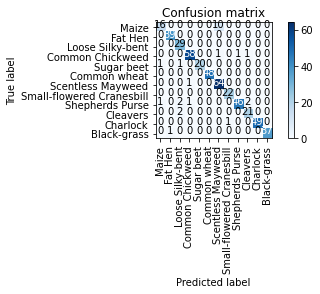

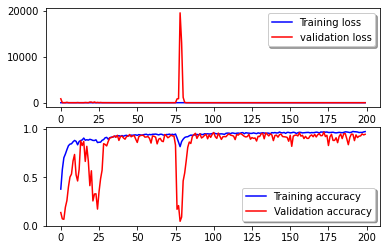

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8dc128850>:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        26
           1       0.97      1.00      0.99        39
           2       0.85      1.00      0.92        29
           3       0.97      0.95      0.96        61
           4       1.00      0.91      0.95        22
           5       1.00      1.00      1.00        48
           6       0.85      0.98      0.91        65
           7       0.96      1.00      0.98        22
           8       0.98      0.88      0.93        52
           9       0.88      0.91      0.89        23
          10       1.00      0.98      0.99        50
          11       1.00      0.97      0.99        38

    accuracy                           0.95       475
   macro avg       0.95      0.93      0.94       475
weighted avg       0.95      0.95      0.94       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_InceptionV3_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet50

In [ ]:
# Create a ResNet50 model
ResNet50 = ResNet50(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))

model= Sequential()
model.add(ResNet50) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=2048))#ResNet50 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(512,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


94773248/94765736 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
batch_normalization_109 (Bat (None, 1024)              4096      
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               524800    
_______________________________________________________

Epoch 1/200
33/33 - 19s - loss: 2.9809 - accuracy: 0.1695 - val_loss: 89.2144 - val_accuracy: 0.1368
Epoch 2/200
33/33 - 9s - loss: 1.9116 - accuracy: 0.3970 - val_loss: 113.8908 - val_accuracy: 0.1368
Epoch 3/200
33/33 - 10s - loss: 1.4050 - accuracy: 0.5488 - val_loss: 8.4644 - val_accuracy: 0.1368
Epoch 4/200
33/33 - 9s - loss: 1.0210 - accuracy: 0.6725 - val_loss: 5.6033 - val_accuracy: 0.1368
Epoch 5/200
33/33 - 9s - loss: 0.8163 - accuracy: 0.7367 - val_loss: 5.7789 - val_accuracy: 0.1368
Epoch 6/200
33/33 - 9s - loss: 0.6862 - accuracy: 0.7823 - val_loss: 5.0046 - val_accuracy: 0.1368
Epoch 7/200
33/33 - 9s - loss: 0.6307 - accuracy: 0.8027 - val_loss: 5.1470 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 9s - loss: 0.6332 - accuracy: 0.8011 - val_loss: 4.5394 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 9s - loss: 0.5122 - accuracy: 0.8404 - val_loss: 7.2806 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 9s - loss: 0.4634 - accuracy: 0.8541 - val_loss: 6.0459 - val_accuracy: 0.0547
Epoc

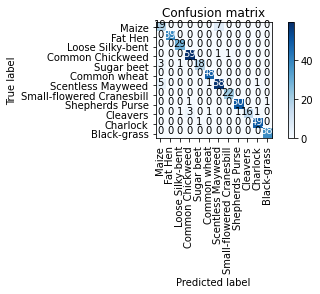

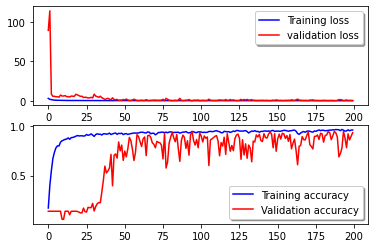

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fed3751de10>:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       1.00      1.00      1.00        39
           2       0.94      1.00      0.97        29
           3       0.94      0.97      0.95        61
           4       0.95      0.82      0.88        22
           5       0.96      1.00      0.98        48
           6       0.88      0.89      0.89        65
           7       0.96      1.00      0.98        22
           8       0.98      0.96      0.97        52
           9       1.00      0.70      0.82        23
          10       0.96      0.98      0.97        50
          11       0.97      1.00      0.99        38

    accuracy                           0.94       475
   macro avg       0.94      0.92      0.93       475
weighted avg       0.94      0.94      0.94       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission


In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet50_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet101

In [ ]:
# Create a ResNet101 model
ResNet101 = ResNet101(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))

model= Sequential()
model.add(ResNet101) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=2048))#ResNet101 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(512,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


171450368/171446536 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 3, 3, 2048)        42658176  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_______________________________________________________

Epoch 1/200
33/33 - 62s - loss: 3.1581 - accuracy: 0.1481 - val_loss: 12226931.0000 - val_accuracy: 0.1284
Epoch 2/200
33/33 - 13s - loss: 2.4272 - accuracy: 0.2686 - val_loss: 18705.3340 - val_accuracy: 0.0547
Epoch 3/200
33/33 - 13s - loss: 2.0103 - accuracy: 0.3646 - val_loss: 10.6884 - val_accuracy: 0.1368
Epoch 4/200
33/33 - 14s - loss: 1.9012 - accuracy: 0.3931 - val_loss: 2.7921 - val_accuracy: 0.1011
Epoch 5/200
33/33 - 14s - loss: 1.6686 - accuracy: 0.4360 - val_loss: 556132.3750 - val_accuracy: 0.1368
Epoch 6/200
33/33 - 14s - loss: 1.4516 - accuracy: 0.4820 - val_loss: 10.2846 - val_accuracy: 0.1368
Epoch 7/200
33/33 - 14s - loss: 1.2871 - accuracy: 0.5467 - val_loss: 7.3470 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 14s - loss: 1.3427 - accuracy: 0.5322 - val_loss: 3.9624 - val_accuracy: 0.1368
Epoch 9/200
33/33 - 14s - loss: 1.1424 - accuracy: 0.6062 - val_loss: 3.5298 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 14s - loss: 1.0918 - accuracy: 0.6258 - val_loss: 5.7960 - va

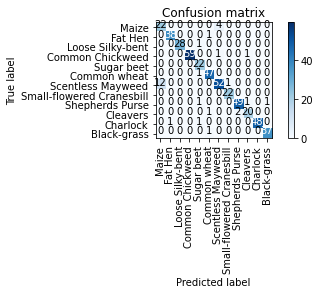

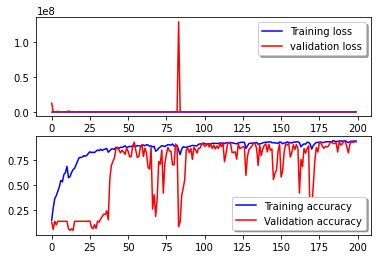

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f912eb46d90>:
              precision    recall  f1-score   support

           0       0.65      0.85      0.73        26
           1       0.97      0.97      0.97        39
           2       1.00      0.97      0.98        29
           3       1.00      0.97      0.98        61
           4       0.85      1.00      0.92        22
           5       0.94      0.98      0.96        48
           6       0.91      0.80      0.85        65
           7       0.96      1.00      0.98        22
           8       0.96      0.94      0.95        52
           9       0.91      0.87      0.89        23
          10       1.00      0.96      0.98        50
          11       0.97      0.97      0.97        38

    accuracy                           0.93       475
   macro avg       0.93      0.94      0.93       475
weighted avg       0.94      0.93      0.94       475




In [ ]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission



In [ ]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet101_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)

#ResNet152

In [20]:
# Create a ResNet152 model
ResNet152 = ResNet152(
    include_top=False, weights='imagenet',
    input_shape=(size, size, channel ))

model= Sequential()
model.add(ResNet152) 
model.add(Flatten()) 


#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=2048))#ResNet152 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(512,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(256,activation=('relu'))) 
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(128,activation=('relu')))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(Num_classes,activation=('softmax'))) 

#Checking the final model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 3, 3, 2048)        58370944  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
batch_normalization_8 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)              

Epoch 1/200
33/33 - 38s - loss: 3.1530 - accuracy: 0.1490 - val_loss: 162092144.0000 - val_accuracy: 0.0821
Epoch 2/200
33/33 - 20s - loss: 2.5334 - accuracy: 0.2358 - val_loss: 20208.4160 - val_accuracy: 0.1368
Epoch 3/200
33/33 - 20s - loss: 2.0505 - accuracy: 0.3342 - val_loss: 2856.1858 - val_accuracy: 0.1368
Epoch 4/200
33/33 - 19s - loss: 1.7590 - accuracy: 0.3998 - val_loss: 486.3134 - val_accuracy: 0.1368
Epoch 5/200
33/33 - 20s - loss: 1.4711 - accuracy: 0.4873 - val_loss: 86.7565 - val_accuracy: 0.1368
Epoch 6/200
33/33 - 20s - loss: 1.3004 - accuracy: 0.5483 - val_loss: 37.8178 - val_accuracy: 0.1368
Epoch 7/200
33/33 - 20s - loss: 1.1726 - accuracy: 0.5913 - val_loss: 12.4785 - val_accuracy: 0.1368
Epoch 8/200
33/33 - 20s - loss: 1.0235 - accuracy: 0.6503 - val_loss: 4.5145 - val_accuracy: 0.0547
Epoch 9/200
33/33 - 20s - loss: 0.8898 - accuracy: 0.7080 - val_loss: 5.5657 - val_accuracy: 0.1368
Epoch 10/200
33/33 - 20s - loss: 0.8283 - accuracy: 0.7420 - val_loss: 5.4846 - 

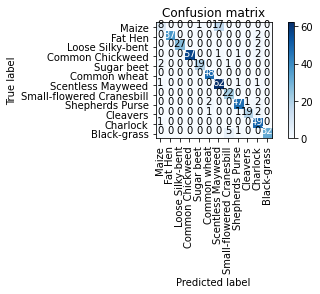

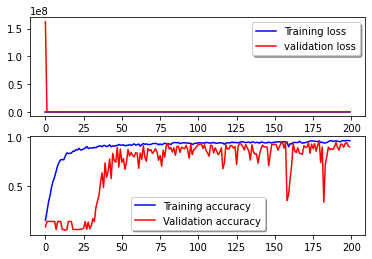

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f912efe7a50>:
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        26
           1       1.00      0.95      0.97        39
           2       1.00      0.93      0.96        29
           3       1.00      0.93      0.97        61
           4       0.95      0.86      0.90        22
           5       0.94      1.00      0.97        48
           6       0.78      0.95      0.86        65
           7       0.79      1.00      0.88        22
           8       0.92      0.90      0.91        52
           9       0.95      0.83      0.88        23
          10       0.82      0.98      0.89        50
          11       1.00      0.84      0.91        38

    accuracy                           0.90       475
   macro avg       0.90      0.87      0.88       475
weighted avg       0.90      0.90      0.89       475




In [21]:

start_time = tools.start_end_timer(None)
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])


#Data augmentation
#Alter the training data with small transformations
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(xtrain)

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit Model
epochs = 200
batch_size = 128

history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


tools.start_end_timer(start_time)


#Evaluate
start_time = tools.start_end_timer(None)
Y_pred = model.predict(xval)
tools.start_end_timer(start_time)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(yval,axis = 1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
evaluate_class.plot_confusion_matrix(confusion_mtx, classes = species)
evaluate_class.plot_loss_acc_curves(history)
evaluate_class.Clf_report(model,Y_true,Y_pred_classes)

#Prediction use for Kaggle Submission



In [22]:
y_test = model.predict(xtest)


submit_filename = '/content/drive/MyDrive/plant-seedlings-classification/PlantSeed_Classification_ResNet152_AdditionDenseLayers.csv'
Y_pred_classes = np.argmax(y_test,axis = 1)
Y_pred_df = labels.inverse_transform(Y_pred_classes)
results_data = pd.DataFrame(data={'file':test_data['img'], 'species':Y_pred_df})
results_data.to_csv(submit_filename, index=False)